In [1]:
import RPi.GPIO as GPIO
import numpy as np
import spiUtils as su
import time
import matplotlib.pyplot as plt
from scipy.io.wavfile import read

GPIO.setmode(GPIO.BCM)
audio_pin = 27
led_pin = 26
GPIO.setup(audio_pin, GPIO.IN, pull_up_down=GPIO.PUD_DOWN)
GPIO.setup(led_pin, GPIO.OUT)

In [2]:
print(GPIO.input(audio_pin))
raw_signal = su.readADC(channel=0)
voltage = raw_signal * 5 / 1024
print(voltage)

1
4.21875


In [5]:
# collect data from piezo

start_time = time.time()
end_time = start_time + 10
audio_in = []

GPIO.output(led_pin, True)
while time.time() < end_time:
    audio_in += [su.readADC(channel=1)]
    
GPIO.output(led_pin, False)

In [23]:
# collect data from .wav file

wav_file = '/home/pi/Capstone/f1.wav'
wav_data = read(wav_file, mmap=True)
audio_in = np.array(wav_data[1], dtype=float)

UnboundLocalError: local variable 'fs' referenced before assignment

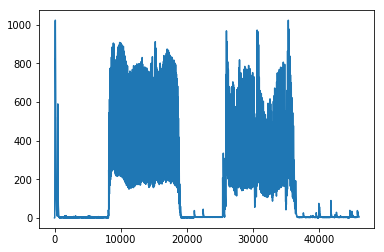

In [6]:
plt.plot(audio_in)
plt.show()

In [9]:
np.save('dig22Apr19.npy', np.array(audio_in))

In [10]:
audio_fft = np.fft.fft(np.array(audio_in))
np.save('dig22Apr19_fft.npy', audio_fft)

In [10]:
samp_rate = float(len(audio_in)) / 10.0
clean_slice = audio_in[20000:30000]

In [11]:
print(clean_slice)
print(samp_rate)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 4, 5, 5, 6, 6, 7, 7, 7, 7, 7, 7, 6, 7, 8, 9, 8, 7, 7, 6, 5, 5, 5, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 3, 4, 4, 5, 5, 5, 5, 6, 6, 7, 7, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 12, 10, 8, 9, 12, 12, 14, 13, 12, 11, 10, 11, 12, 12, 11, 7, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 